### Secondary metabolite genes notebook

#### Bats: Resistance and production of antibiotics while roosting or on the wing

Understanding resistance to antibiotics is a critical need management of infectious diseases. Antibiotic resistance genes have been found across a range of environments from soils, caves, human skin, surfaces in hospitals, rivers, oceans, and fecal matter. These environments can act as transferable reservoirs of antibiotic resistance. Bats have been identified as being reservoirs of new and novel viruses (Calisher et al., 2006). However, little is known about the microbial resistance genes on found on bats and if these can act as reservoirs for transferring resistance genes in the environment.

#### Authors
Ara S. Winter<sup>1</sup>*, Jason C. Kimble<sup>1</sup>, Debbie C. Buecher<sup>2</sup>, Ernest W. Valdez<sup>3</sup>, Jennifer J. M. Hathaway<sup>1</sup>, Andrea Porras-Alfaro<sup>4</sup>, and Diana E. Northup<sup>1</sup>

1 Department of Biology, University of New Mexico, Albuquerque, New Mexico, United States of America

2 Buecher Biological Consulting, Tucson, Arizona, United States of America

3 United States Geological Survey, Fort Collins Science Center, Colorado; Biology Department, MSC03 2020, University of New Mexico, Albuquerque, New Mexico, United States of America

4 Department of Biological Sciences, Western Illinois University, Macomb, Illinois, United States of America

Corresponding author

E-mail: akooser@unm.edu

### Methods

#### Bat sampling
We sampled 31 bats belonging to 4 species (Myotis thysanodes M. velifer, Tadarida brasiliensis, and Antrozous pallidus). These samples came from three study locations in Carlsbad Caverns National Park (CCNP). Bat sample collection was allowed under the following permits: National Park Service Scientific Collecting Permit (CAVE-2014-SCI-0012), Fort Collins Science Center Standard Operating Procedure (SOP) SOP#: 2013-01, and an Institutional Animal Care and Use Committee (IACUC) Permit from the University of New Mexico (Protocol #15-101307-MC) and from the National Park Service (Protocol #IMR_ELMA.PARA.CAVE.SEAZ_Northup_Bats_2015.A2).

Cave-caught bats were either plucked from the walls of the caves in ELMA, FS, and HGL or netted in sterilized nets in Carlsbad Cavern in CCNP in a location along their flight path out of the cave. Cave-caught bats were typically sampled 6-8 hours after returning to the cave in the early morning. Surface-netted bats were netted after sundown using sterilized nets near water sources in CCNP. All bats were handled with clean gloves and swabbed for DNA before other measurements were taken to limit contamination by human-associated microbiota. Using a sterile swab moistened with Ringer’s Solution (Hille, 1984), the entire skin (i.e., ears, wings and uropatagia) and furred surfaces of each bat were thoroughly swabbed. While the bat biologist held the bat in appropriate positions to give access to the area to be swabbed, the microbiologist rubbed each area with the sterile swab approximately 3-5 times, rotating the swab as the action was performed.

Each swab was placed in a sterile 1.7 ml snap-cap microcentrifuge tube containing 100 ul of RNAlater, and immediately frozen in a liquid nitrogen dry shipper or placed on dry ice. Samples were transported to the University of New Mexico and stored in a -80°C freezer. Samples were sent to MR DNA Molecular Research LP, Shallowater, Texas (http://www.mrdnalab.com/) for genomic DNA extraction.

#### Sequencing
Metagenomic shotgun reads were sequenced at MR DNA (2015-2016) using HiSeq 2x150bp Illumina HiSeq 2500 platform (www.illumina.com) sequencing. Metagenome sequencing steps included the isolation and purification of genomic DNA, fragmentation, ligation to sequencing adapters and purification. Libraries were pooled and sequenced following amplification and denaturation. A total of 50 ng of DNA from each of the FSC samples was used to prepare DNA libraries using Nextera DNA library preparation kit to build individual barcode catalogs. Library insert size was determined by Experion Automated Electrophoresis Station (Bio-Rad). Pooled library (12pM) was loaded to a 600 Cycles v3 Reagent cartridge (Illumina).

#### Data processing
Join paired-ends
pear -y 8G -j 2 -p 0.05 -g 2 -f RSS140624-1_S19_L002_R1_001.fastq.gz -r RSS140624-1_S19_L002_R2_001.fastq.gz 
-o RSS140624_1_S19 

##### Fastq convert to fasta
fastq_to_fasta.py

##### Digital normalization (removes redundant kmers)
normalize-by-median.py -k 21 -M 8e9 --cutoff=20 ELMA140612_1_S56.fasta (khmer package)

##### Recover LSU and SSUs from reads
metaxa2 -i CC15062425_S8.fasta -o CC15062425_S8 --cpu 6 --align none

metaxa2_ttt -i CC15062425_S8.taxonomy.txt -o CC15062425_S8_taxa_sum.txt

Put all the L2 and L3 into separate folders and then run:
metaxa2_dc -o metaxa_summary_L2.txt -r *.level_2.txt

##### Hashing to metagenomes (sourmash and mash) 

sourmash compute -f ELMA140612_1_S56.fasta.keep

sourmash compare *.sig -o cmp

sourmash plot cmp

##### Convert nuc reads to aa
prodigal -i CC15062421_S7.classseqs.fasta -a CC15062421_S7.faa -p meta > /dev/null

##### Functional gene annotation
hmmsearch --cpu 6 --domtblout retroviridae_S19 ~/Documents/hmmer_profiles/eggnog/hmm_files/retorviridae_eggnog.hmm CC1506261_S19.faa > /dev/null

Used: resFam-full.hmm, custom fungal nrps, PKSII alpha, and pfam secondary metabolite profiles.


In [2]:
import seaborn as sns
import pandas as pd
import glob
import os

# This is a commnet. The line the follows allows for inline plotting. i.e. your plots will show up in these boxes.
%matplotlib inline

The chunk of code that follows here is for wrangling the output of hmmer functional gene profiling into something human readable and readable by pandas in python. 

In [78]:
path = '/Users/ara/Documents/bat_metagenomes/2ndmeta/'                     # use your path

In [79]:
my_dir = path
filelist = []
filesList = []
os.chdir( my_dir )

In [80]:
for files in glob.glob("*.2ndmeta"):
    #fileName, fileExtension = os.path.splitext(files)
    filelist.append(filesList) #filename without extension
    filesList.append(files) #filename with extension

In [81]:
df = pd.DataFrame()
for ijk in filesList:
    frame = pd.read_csv(ijk,skiprows=3, skipfooter=11 ,delim_whitespace=True,
                      engine='python',header=None)
    frame['sample_id']=ijk
    df = df.append(frame) 
    

In [82]:
df.columns = ['hmmer_seq','','','gene','','','E-value','bit score','','','','','','','','','','','','','','',
                         '','','','','','','','','sample_id']

In [83]:
df.head(3)

,hmmer_seq,,,gene,,,E-value,bit score,,,...,,,,,,,,,,sample_id
0,D00420:54:H9U8TADXX:1:1116:5524:34267_1,-,64,ABM,PF03992.12,78,2.600000e-11,48.8,0.4,1,...,0.94,#,3,#,194,#,1,#,ID=376411_1;partial=11;start_type=Edge;rbs_mot...,CC140620_1.2ndmeta
1,D00420:54:H9U8TADXX:1:2103:5004:61966_1,-,60,ABM,PF03992.12,78,8.600000e-08,37.6,0.0,1,...,0.96,#,2,#,181,#,-1,#,ID=788529_1;partial=11;start_type=Edge;rbs_mot...,CC140620_1.2ndmeta
2,D00420:54:H9U8TADXX:1:2104:17719:50700_1,-,72,ABM,PF03992.12,78,4.100000e-06,32.2,0.5,1,...,0.93,#,19,#,234,#,-1,#,ID=805532_1;partial=01;start_type=Edge;rbs_mot...,CC140620_1.2ndmeta


In [84]:
hmmer_results = df.loc[:,['hmmer_seq','gene','E-value','bit score','sample_id']]

In [85]:
hmmer_filter = hmmer_results.loc[hmmer_results['bit score'] > 24]

In [86]:
hmmer_filter.shape

(23060, 5)

In [87]:
df = hmmer_filter.groupby( [ "sample_id", "gene"] ).size().to_frame(name = 'count').reset_index()

In [88]:
hmmer_pivot = df.pivot(index='sample_id', columns='gene', values='count')

In [89]:
del hmmer_pivot.index.name

In [90]:
hmmer_pivot.shape

(25, 27)

In [91]:
hmmer_clean = hmmer_pivot.fillna(0)

In [92]:
hmmer_clean.reset_index(level=0, inplace=True)

In [93]:
hmmer_clean=hmmer_clean.rename(columns = {'index':'id'})

In [94]:
hmmer_clean.head(3)

gene,id,ABM,Actino_peptide,Acyl_transf_1,Acyltransferase,Aminotran_1_2,Aminotran_3,Bacteroid_pep,Carbam_trans_C,Chal_sti_synt_C,...,MbtH,NRPS,PP-binding,PS-DH,Penicil_amidase,SAT,SchA_CurD,TfuA,Thioesterase,pksII_alpha
0,CC140620_1.2ndmeta,10.0,0.0,100.0,88.0,216.0,260.0,0.0,6.0,10.0,...,0.0,2.0,178.0,2.0,120.0,2.0,0.0,0.0,62.0,110.0
1,CC140620_25.2ndmeta,12.0,0.0,46.0,50.0,147.0,181.0,2.0,22.0,0.0,...,0.0,0.0,126.0,4.0,44.0,0.0,0.0,0.0,22.0,92.0
2,CC140620_33.2ndmeta,10.0,0.0,136.0,32.0,103.0,142.0,0.0,4.0,2.0,...,0.0,0.0,96.0,6.0,42.0,0.0,0.0,0.0,8.0,89.0


In [95]:
hmmer_clean.columns

Index(['id', 'ABM', 'Actino_peptide', 'Acyl_transf_1', 'Acyltransferase',
       'Aminotran_1_2', 'Aminotran_3', 'Bacteroid_pep', 'Carbam_trans_C',
       'Chal_sti_synt_C', 'Chal_sti_synt_N', 'Chalcone_3', 'Condensation',
       'Cyclase_polyket', 'FAE1_CUT1_RppA', 'Herpeto_peptide', 'KR',
       'LANC_like', 'MbtH', 'NRPS', 'PP-binding', 'PS-DH', 'Penicil_amidase',
       'SAT', 'SchA_CurD', 'TfuA', 'Thioesterase', 'pksII_alpha'],
      dtype='object', name='gene')

### Results

#### Top twenty resistance gene hits

In [96]:
hmmer_clean.sum(numeric_only=True).sort_values(ascending=False).head(20)

gene
Aminotran_3        4332.0
Aminotran_1_2      4092.0
pksII_alpha        2493.0
PP-binding         2144.0
Condensation       2142.0
Acyltransferase    1940.0
Penicil_amidase    1488.0
Acyl_transf_1      1484.0
KR                 1086.0
Thioesterase        552.0
ABM                 394.0
LANC_like           178.0
Carbam_trans_C      142.0
FAE1_CUT1_RppA      128.0
Chal_sti_synt_N     112.0
Chal_sti_synt_C     112.0
PS-DH                98.0
MbtH                 54.0
Chalcone_3           38.0
NRPS                 14.0
dtype: float64

Here we are reading in the metadata file.

In [97]:
metadata = pd.read_csv("2ndmeta_metadata.txt",sep="\t",header=0)

In [98]:
metadata.shape

(30, 11)

In [99]:
metadata.head(3)

,id,sample,species,location,cave_or_surface,forearm,feed_flight,diet,recov_lsu_ssu,library_size,avg_seq_len
0,CC140620_1.2ndmeta,CC140620_1,Myotis velifer,CAVE,cave,44.0,Aerial hawking,generalistbeetles,706,1413632,181.2
1,CC140620_25.2ndmeta,CC140620_25,Myotis velifer,CAVE,cave,44.0,Aerial hawking,generalistbeetles,273,1629876,198.4
2,CC140620_33.2ndmeta,CC140620_33,Myotis velifer,CAVE,cave,45.0,Aerial hawking,generalistbeetles,193,576956,193.9


In [116]:
hmmer_hits_S = hmmer_clean.div(metadata['recov_lsu_ssu'],axis=0,numeric_only=True)
hmmer_hits_S.head(3)

TypeError: f() got an unexpected keyword argument 'numeric_only'

In [100]:
merged_hmmer = pd.merge(hmmer_clean, metadata, on='id')

In [101]:
merged_hmmer.shape

(25, 38)

In [102]:
merged_hmmer.head(3)

gene,id,ABM,Actino_peptide,Acyl_transf_1,Acyltransferase,Aminotran_1_2,Aminotran_3,Bacteroid_pep,Carbam_trans_C,Chal_sti_synt_C,...,sample,species,location,cave_or_surface,forearm,feed_flight,diet,recov_lsu_ssu,library_size,avg_seq_len
0,CC140620_1.2ndmeta,10.0,0.0,100.0,88.0,216.0,260.0,0.0,6.0,10.0,...,CC140620_1,Myotis velifer,CAVE,cave,44.0,Aerial hawking,generalistbeetles,706,1413632,181.2
1,CC140620_25.2ndmeta,12.0,0.0,46.0,50.0,147.0,181.0,2.0,22.0,0.0,...,CC140620_25,Myotis velifer,CAVE,cave,44.0,Aerial hawking,generalistbeetles,273,1629876,198.4
2,CC140620_33.2ndmeta,10.0,0.0,136.0,32.0,103.0,142.0,0.0,4.0,2.0,...,CC140620_33,Myotis velifer,CAVE,cave,45.0,Aerial hawking,generalistbeetles,193,576956,193.9


### Background
Nesme et al., 2014 paper, Large-Scale Metagenomic-Based Study of Antibiotic Resistance in the Environment showed that microbial resistance genes are present in a range of environments. 

>"The most common types of resistances found in
>environmental metagenomes were efflux pumps and
>genes conferring resistance to vancomycin, tetracycline,
>or b-lactam antibiotics used in veterinary and human healthcare.
>Our study describes the diverse and abundant antibiotic
>resistance genes in nonclinical environments and
>shows that these genes are not randomly distributed among
>different environments"




Secondary metabolite gene with more than 100 hits across all CAVE bat metagenomes.

|Gene name        |Hits    |Class       |
|-----------------|--------|------------|
|Aminotran_3      |  4332.0|PKS         |
|Aminotran_1_2    |  4092.0|PKS         |
|pksII_alpha      |  2493.0|PKSIIa      |
|PP-binding       |  2144.0|PKS         |
|Condensation     |  2142.0|NRPS        |
|Acyltransferase  |  1940.0|PKS         |
|Penicil_amidase  |  1488.0|            |
|Acyl_transf_1    |  1484.0|PKS         |
|KR               |  1086.0|PKS         |
|Thioesterase     |   552.0|NRPS        |
|ABM              |   394.0|PKSI/PKSII  |
|LANC_like        |   178.0|lantibiotics|
|Carbam_trans_C   |   142.0|PKS         |
|FAE1_CUT1_RppA   |   128.0|PKS III     |
|Chal_sti_synt_N  |   112.0|PKS III     |
|Chal_sti_synt_C  |   112.0|PKS III     |



ValueError: operands could not be broadcast together with shapes (1100,) (25,) 

In [105]:
merged_hmmer['Aminotran_3_S'] = merged_hmmer[['Aminotran_3']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Aminotran_1_2_S'] = merged_hmmer[['Aminotran_1_2']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['pksII_alpha_S'] = merged_hmmer[['pksII_alpha']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['PP_binding_S'] = merged_hmmer[['PP-binding']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Condensation_S'] = merged_hmmer[['Condensation']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['FAE1_CUT1_RppA_S'] = merged_hmmer[['FAE1_CUT1_RppA']].div(merged_hmmer.recov_lsu_ssu, axis=0)

Here is a plot of the five most abundant gene hits by raw counts. Below we scale the data by total recovered LSU and SSU genes.

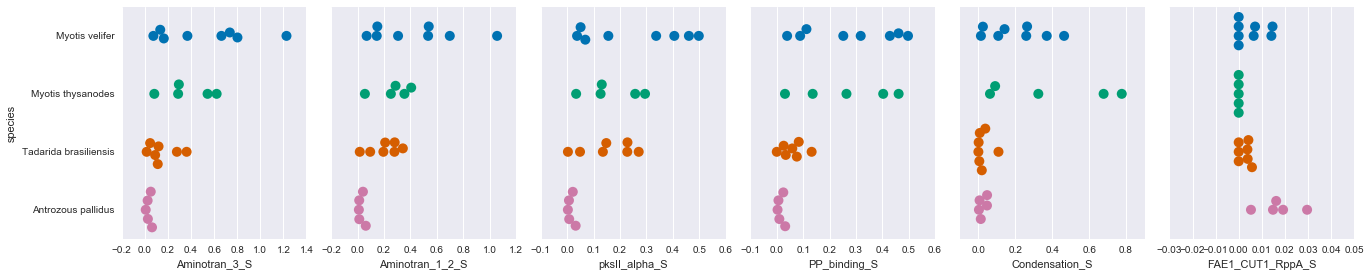

In [106]:
g = sns.PairGrid(merged_hmmer,
                 y_vars=["species"],
                 x_vars=["Aminotran_3_S", "Aminotran_1_2_S","pksII_alpha_S",
                        "PP_binding_S","Condensation_S","FAE1_CUT1_RppA_S"],
                 aspect=.75, size=4)
g.map(sns.swarmplot, palette="colorblind",size=10)

In [107]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [108]:
result = smf.ols(formula="PP_binding_S ~ forearm + diet + species + location + cave_or_surface", data=merged_hmmer).fit()

In [109]:
print(result.params)

Intercept                          -0.515110
diet[T.mothsbeetles]               -0.468493
species[T.Myotis thysanodes]        0.301027
species[T.Myotis velifer]          -0.046617
species[T.Tadarida brasiliensis]    0.269463
location[T.RSS]                    -0.100067
location[T.WCS]                     0.003748
cave_or_surface[T.surface]         -0.096319
forearm                             0.021214
dtype: float64


In [110]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           PP_binding_S   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     6.274
Date:                Wed, 12 Oct 2016   Prob (F-statistic):            0.00127
Time:                        14:53:10   Log-Likelihood:                 22.638
No. Observations:                  24   AIC:                            -31.28
Df Residuals:                      17   BIC:                            -23.03
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

In [112]:
mod1 = smf.glm(formula="PP_binding_S ~ forearm + diet + species + location + cave_or_surface", data=merged_hmmer,
               family=sm.families.Gaussian()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           PP_binding_S   No. Observations:                   24
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                 0.0125311147858
Method:                          IRLS   Log-Likelihood:                 22.638
Date:                Wed, 12 Oct 2016   Deviance:                      0.21303
Time:                        14:57:54   Pearson chi2:                    0.213
No. Iterations:                     4                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                           -0.5151      0.611     -0.843      0.399        -1.713     0.682
diet[T.mothsbeetles]                -0.4685      0.398     -1.177      0.239        -1.249     0.312
species[T.Myotis thysanodes]         0.3010      0.212      1.418      0.156        -0.115     0.717
species[T.Myotis velifer]           -0.0466      0.218     -0.214      0.831        -0.474     0.381
species[T.Tadarida brasiliensis]     0.2695      0.187      1.443      0.149        -0.097     0.635
location[T.RSS]                     -0.1001      0.040     -2.519      0.012        -0.178    -0.022
location[T.WCS]                      0.0037      0.046      0.081      0.935        -0.087     0.094
cave_or_surface[T.surface]          -0.0963      0.058     -1.662      0.096        -0.210     0.017
forearm                              0.0212      0.019      1.145      0.252        -0.015     0.058
====================================================================================================
"""

In [44]:
df_counts = pd.DataFrame(hmmer_clean.sum(numeric_only=True).sort_values(ascending=False))

In [45]:
df_rel = pd.DataFrame((df_counts/df_counts.sum()*100))

In [46]:
df_rel.head(11)

,0
gene,
Aminotran_3,18.785776
Aminotran_1_2,17.745013
pksII_alpha,10.810928
PP-binding,9.297485
Condensation,9.288812
Acyltransferase,8.412836
Penicil_amidase,6.452732
Acyl_transf_1,6.435386
KR,4.709454


In [58]:
from scipy.spatial.distance import *
import numpy as np
from sklearn import manifold

In [59]:
mds_df = hmmer_clean.drop('id',1)
dist_mat = squareform(pdist(mds_df,'braycurtis'))

In [60]:
pd.DataFrame(dist_mat, columns = merged_hmmer['id'], index=merged_hmmer['id']).head()

id,CC140620_1.2ndmeta,CC140620_25.2ndmeta,CC140620_33.2ndmeta,CC140620_37.2ndmeta,CC140620_5.2ndmeta,CC150624_21.2ndmeta,CC150624_25.2ndmeta,CC150624_29.2ndmeta,CC150626_1.2ndmeta,RSS140621_1.2ndmeta,...,RSS150623_13.2ndmeta,RSS150623_9.2ndmeta,RSS150627_1.2ndmeta,RSS150627_5.2ndmeta,WCS140623_1.2ndmeta,WCS140623_13.2ndmeta,WCS140623_5.2ndmeta,WCS140623_9.2ndmeta,WCS150622_5.2ndmeta,WCS150622_9.2ndmeta
id,,,,,,,,,,,,,,,,,,,,,
CC140620_1.2ndmeta,0.000000,0.232378,0.316067,0.599522,0.104619,0.161157,0.217928,0.672295,0.161157,0.637028,...,0.256176,0.607725,0.404145,0.458003,0.886475,0.892045,0.562463,0.911681,0.174774,0.658203
CC140620_25.2ndmeta,0.232378,0.000000,0.186420,0.471854,0.214700,0.298893,0.189629,0.544974,0.298893,0.508921,...,0.176060,0.454698,0.250512,0.308123,0.869023,0.868505,0.422581,0.902023,0.329889,0.762819
CC140620_33.2ndmeta,0.316067,0.186420,0.000000,0.478976,0.295803,0.383226,0.269293,0.490196,0.383226,0.460019,...,0.259490,0.400742,0.249445,0.325723,0.860849,0.860072,0.396092,0.898182,0.401332,0.790251
CC140620_37.2ndmeta,0.599522,0.471854,0.478976,0.000000,0.562905,0.651856,0.546149,0.253289,0.651856,0.271889,...,0.534728,0.294294,0.320554,0.266075,0.720183,0.683453,0.448179,0.777240,0.668342,0.899823
CC140620_5.2ndmeta,0.104619,0.214700,0.295803,0.562905,0.000000,0.179228,0.213385,0.643052,0.179228,0.606883,...,0.217518,0.581913,0.379655,0.438138,0.896605,0.893500,0.526048,0.924588,0.174737,0.685632


In [61]:
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=3, n_jobs = 2, 
                   metric=False, max_iter=3000)
results = mds.fit(dist_mat)
coords = results.embedding_

In [62]:
merged_hmmer['X'] = [c[0] for c in coords]
merged_hmmer['Y'] = [c[1] for c in coords]
merged_hmmer.head(3)

gene,id,ABM,Actino_peptide,Acyl_transf_1,Acyltransferase,Aminotran_1_2,Aminotran_3,Bacteroid_pep,Carbam_trans_C,Chal_sti_synt_C,...,avg_seq_len,Aminotran_3_S,Aminotran_1_2_S,pksII_alpha_S,PP-binding_S,Condensation_S,FAE1_CUT1_RppA_S,PP_binding_S,X,Y
0,CC140620_1.2ndmeta,10.0,0.0,100.0,88.0,216.0,260.0,0.0,6.0,10.0,...,181.2,0.368272,0.305949,0.155807,0.252125,0.141643,0.014164,0.252125,-0.217961,-0.293870
1,CC140620_25.2ndmeta,12.0,0.0,46.0,50.0,147.0,181.0,2.0,22.0,0.0,...,198.4,0.663004,0.538462,0.336996,0.461538,0.263736,0.014652,0.461538,-0.134827,-0.191144
2,CC140620_33.2ndmeta,10.0,0.0,136.0,32.0,103.0,142.0,0.0,4.0,2.0,...,193.9,0.735751,0.533679,0.461140,0.497409,0.259067,0.000000,0.497409,-0.189182,-0.055739


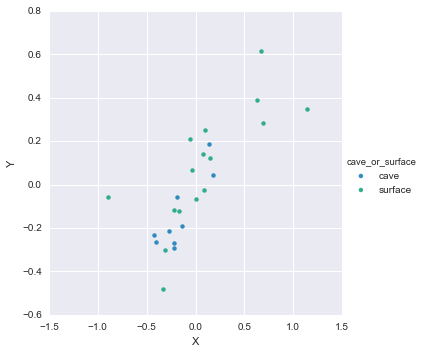

In [66]:
sns.lmplot("X", "Y", data=merged_hmmer, hue='cave_or_surface', fit_reg=False, palette="colorblind")

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from pylab import savefig

In [68]:
mds_df_S = mds_df.div(merged_hmmer['recov_lsu_ssu'],axis=0)
mds_df_S.head(3)

gene,ABM,Actino_peptide,Acyl_transf_1,Acyltransferase,Aminotran_1_2,Aminotran_3,Bacteroid_pep,Carbam_trans_C,Chal_sti_synt_C,Chal_sti_synt_N,...,MbtH,NRPS,PP-binding,PS-DH,Penicil_amidase,SAT,SchA_CurD,TfuA,Thioesterase,pksII_alpha
0,0.014164,0.0,0.141643,0.124646,0.305949,0.368272,0.000000,0.008499,0.014164,0.011331,...,0.0,0.002833,0.252125,0.002833,0.169972,0.002833,0.0,0.0,0.087819,0.155807
1,0.043956,0.0,0.168498,0.183150,0.538462,0.663004,0.007326,0.080586,0.000000,0.007326,...,0.0,0.000000,0.461538,0.014652,0.161172,0.000000,0.0,0.0,0.080586,0.336996
2,0.051813,0.0,0.704663,0.165803,0.533679,0.735751,0.000000,0.020725,0.010363,0.000000,...,0.0,0.000000,0.497409,0.031088,0.217617,0.000000,0.0,0.0,0.041451,0.461140


In [69]:
# generate the linkage matrix
Z = linkage(mds_df_S, method='average')

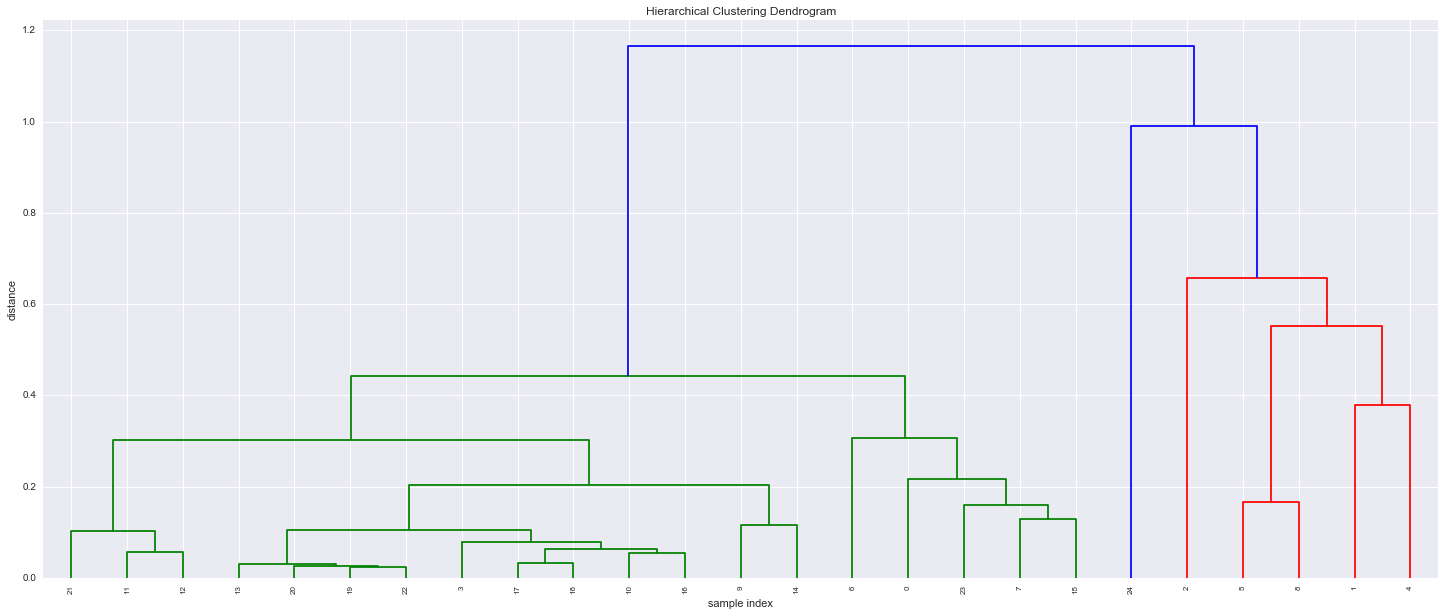

In [71]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
# In matplotlib the show command will reset the figure instance. In other words it goes bye-bye. So you need to save it
# first
plt.savefig('bat_secondary_metabolite_HCA_average.pdf',bbox_inches='tight')
plt.show()

#### References


